<span style="color:#4287f5; font-size:1.2em; font-weight:bold;">1- Import des biblioth√®ques :</span>

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import warnings

# Supprimer les warnings pour une meilleure lisibilit√©
warnings.filterwarnings("ignore")

# Pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

<span style=" color:#4287f5; font-size:1.2em; font-weight:bold"> 2-chargement des donn√©es pr√©cedemment trait√©s dans l'exploration et indexation de variable temporelle </span>

In [3]:
print(" ~~ D√©but de la Mod√©lisation des S√©ries Temporelles ~~ ")

# --- 1. Chargement des donn√©es trait√©es ---
# Utilisation du chemin fourni pour le fichier df_processed.csv
processed_file_path = r"C:\Users\9609241C\london-fire-response\data\raw\Processed\df_processed.csv"
if not os.path.exists(processed_file_path):
    raise FileNotFoundError(f"Le fichier {processed_file_path} n'existe pas. Veuillez v√©rifier le chemin.")
df = pd.read_csv(processed_file_path, parse_dates=['date_heure'], index_col='date_heure')
# V√©rification des donn√©es
print("Donn√©es charg√©es avec succ√®s. Voici les premi√®res lignes :")
print(df.head())
# --- 2. Analyse exploratoire des donn√©es ---
# V√©rification des types de donn√©es
print("\nTypes de donn√©es dans le DataFrame :")

print(df.dtypes)
# V√©rification des valeurs manquantes
print("\nValeurs manquantes dans le DataFrame :")
print(df.isnull().sum())
# V√©rification des doublons
print("\nNombre de doublons dans le DataFrame :")
print(df.duplicated().sum())

 ~~ D√©but de la Mod√©lisation des S√©ries Temporelles ~~ 
Donn√©es charg√©es avec succ√®s. Voici les premi√®res lignes :
             IncidentNumber  CalYear           BoroughName      WardName  \
date_heure                                                                 
2021-01-01  000004-01012021     2021              HARINGEY  Muswell Hill   
2021-01-01  000005-01012021     2021             REDBRIDGE      MONKHAMS   
2021-01-01  000006-01012021     2021  BARKING AND DAGENHAM       Village   
2021-01-01  000007-01012021     2021            WANDSWORTH     West Hill   
2021-01-01  000007-01012021     2021            WANDSWORTH     West Hill   

            HourOfCall  ResourceMobilisationId Resource_Code  \
date_heure                                                     
2021-01-01           0                 5769249          A321   
2021-01-01           0                 5769250          F351   
2021-01-01           0                 5769251          F412   
2021-01-01           0   

<span style=" color:#4287f5 ; font-size:1.2em; font-weight:bold" > 3 - Agr√©gation quotidienne</span>

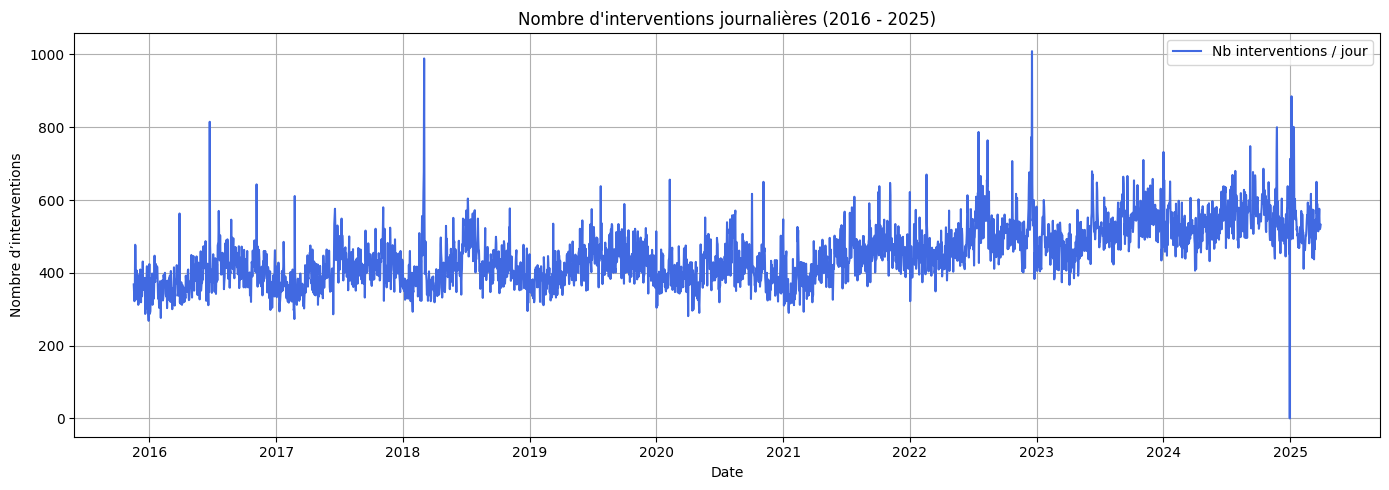

In [4]:
# --- 2. Cr√©ation de la s√©rie temporelle quotidienne ---
series_journali√®re = df.resample('D').size()  # Compte le nombre d‚Äôinterventions par jour

# Visualisation
plt.figure(figsize=(14, 5))
plt.plot(series_journali√®re, label='Nb interventions / jour', color='royalblue')
plt.title("Nombre d'interventions journali√®res (2016 - 2025)")
plt.xlabel("Date")
plt.ylabel("Nombre d‚Äôinterventions")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


 <span style=" color:#4287f5 ; font-size:1.2em; font-weight:bold" > 4 - D√©composition de la s√©rie temporelle </span>

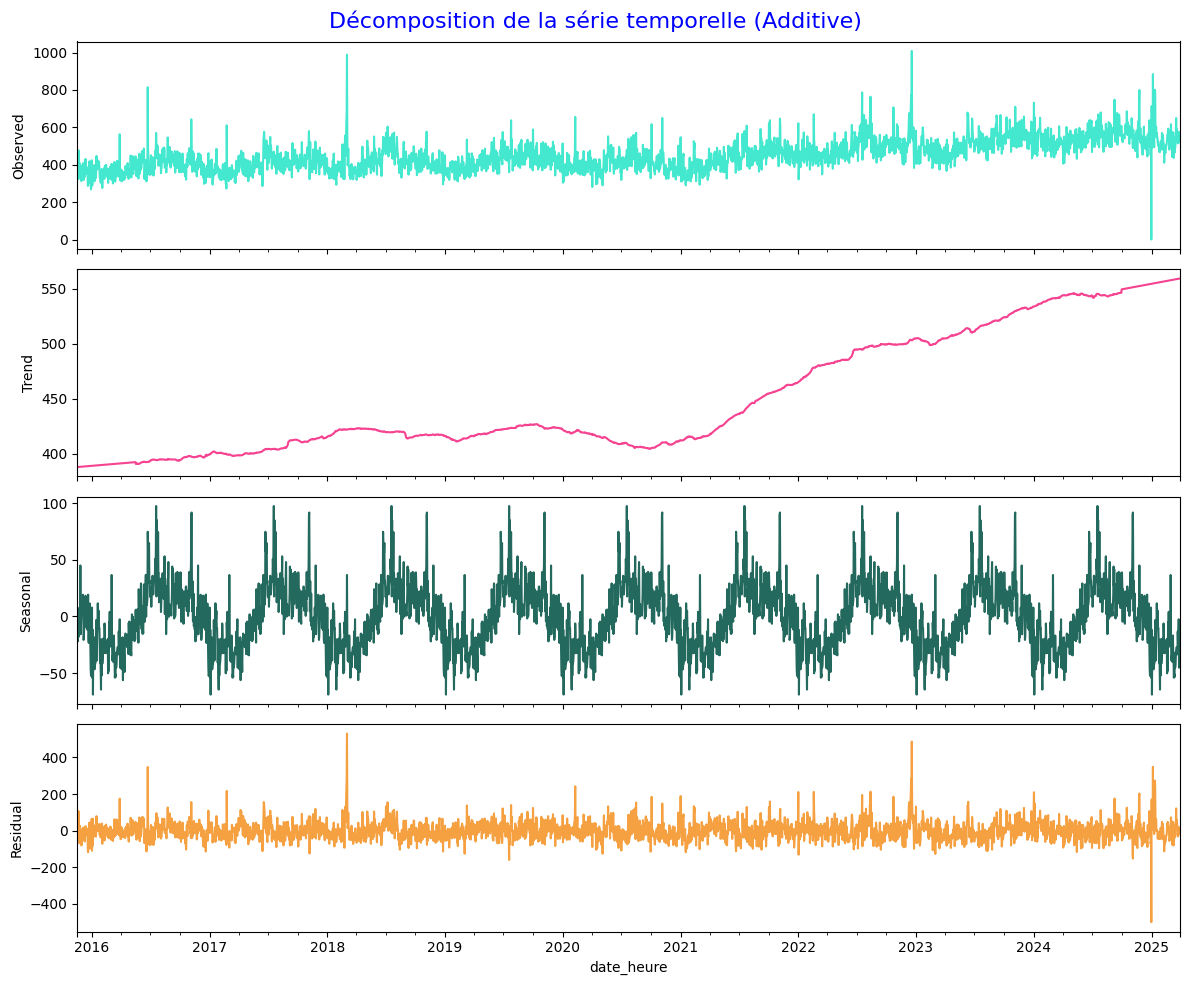

In [5]:
# --- 3. D√©composition saisonni√®re ---
decomposition = seasonal_decompose(series_journali√®re, model='additive', period=365, extrapolate_trend='freq', two_sided=True)

# Cr√©ation de la figure
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Couleurs personnalis√©es pour chaque composante
couleurs = {
    'observed': '#43e8cf',   
    'trend':    '#f54291',  
    'seasonal': '#24695e',   
    'resid':    '#f5a142' 
}

# Trac√©s avec couleurs sp√©cifiques
decomposition.observed.plot(ax=axes[0], color=couleurs['observed'])
axes[0].set_ylabel('Observed')

decomposition.trend.plot(ax=axes[1], color=couleurs['trend'])
axes[1].set_ylabel('Trend')

decomposition.seasonal.plot(ax=axes[2], color=couleurs['seasonal'])
axes[2].set_ylabel('Seasonal')

decomposition.resid.plot(ax=axes[3], color=couleurs['resid'])
axes[3].set_ylabel('Residual')

# Titre principal et ajustement
plt.suptitle("D√©composition de la s√©rie temporelle (Additive)", fontsize=16, color='blue')
plt.tight_layout()
plt.show()

In [ ]:
# --- 3. D√©composition saisonni√®re ---
decomposition = seasonal_decompose(series_journali√®re, model='additive', period=7, extrapolate_trend='freq', two_sided=True)

# Cr√©ation de la figure
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Couleurs personnalis√©es pour chaque composante
couleurs = {
    'observed': '#43e8cf',   
    'trend':    '#f54291',  
    'seasonal': '#24695e',   
    'resid':    '#f5a142' 
}

# Trac√©s avec couleurs sp√©cifiques
decomposition.observed.plot(ax=axes[0], color=couleurs['observed'])
axes[0].set_ylabel('Observed')

decomposition.trend.plot(ax=axes[1], color=couleurs['trend'])
axes[1].set_ylabel('Trend')

decomposition.seasonal.plot(ax=axes[2], color=couleurs['seasonal'])
axes[2].set_ylabel('Seasonal')

decomposition.resid.plot(ax=axes[3], color=couleurs['resid'])
axes[3].set_ylabel('Residual')

# Titre principal et ajustement
plt.suptitle("D√©composition de la s√©rie temporelle (Additive)", fontsize=16, color='blue')
plt.tight_layout()
plt.show()

1. S√©rie originale
Fluctuations journali√®res marqu√©es avec des pics ponctuels.

Complexit√© visible de la s√©rie brute.

2. Tendance
Hausse progressive du nombre d‚Äôincidents entre 2016 et d√©but 2025.
Non stationnaire

3. Saisonnalit√©
Amplitude stable ‚áí coh√©rence avec un mod√®le additif.
Mod√©lisation : un SARIMA avec S=7 est adapt√© pour capter cette dynamique.

4. R√©sidus
Majoritairement al√©atoires, centr√©s autour de z√©ro (bruit blanc).
Quelques outliers d√©tect√©s (√©v√©nements exceptionnels comme vu precedemment !).

==> La d√©composition valide la pr√©sence :
d‚Äôune tendance ascendante,
d‚Äôune saisonnalit√© hebdomadaire stable.
Elle confirme la pertinence du mod√®le SARIMA, qui permet de prendre en compte ces deux composantes pour am√©liorer la pr√©cision des pr√©visions.



<span style=" color:#4287f5 ; font-size:1.2em; font-weight:bold" > 5 - Test de stationnarit√© (ADF Test) </span>

ADF Statistic : -3.1522710770250226
p-value : 0.022919045954070724
La s√©rie est stationnaire (p <= 0.05)


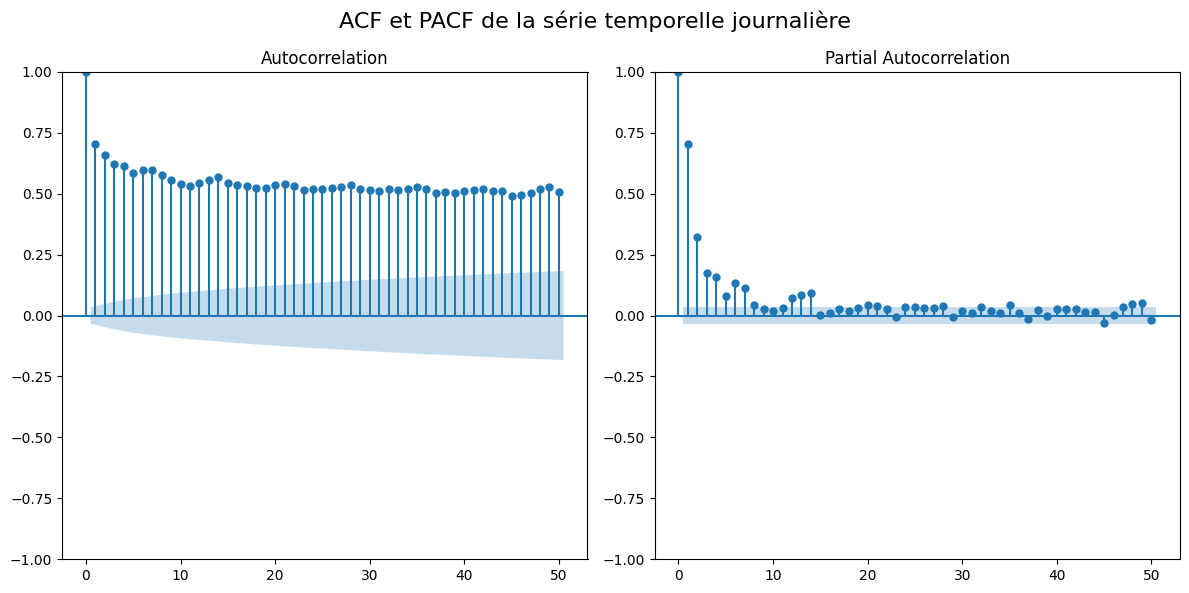

In [6]:
# --- 4. Test ADF (Augmented Dickey-Fuller) ---
result = adfuller(series_journali√®re.dropna())
print('ADF Statistic :', result[0])
print('p-value :', result[1])
if result[1] <= 0.05:
    print("La s√©rie est stationnaire (p <= 0.05)")
else:
    print("La s√©rie n‚Äôest pas stationnaire (p > 0.05) ‚Äî Il faudra diff√©rencier ! ")
# --- 5. Visualisation des ACF et PACF ---
plt.figure(figsize=(12, 6))
plot_acf(series_journali√®re.dropna(), lags=50, ax=plt.subplot(121))
plot_pacf(series_journali√®re.dropna(), lags=50, ax=plt.subplot(122))
plt.suptitle("ACF et PACF de la s√©rie temporelle journali√®re", fontsize=16)
plt.tight_layout()
plt.show()

√Ä partir des graphes :

ACF  √† gauche : d√©croissance lente ‚Üí pr√©sence de d√©pendance persistante = composante AR saisonni√®re.

PACF √† droite : d√©croissance rapide apr√®s le lag 2 √† 3, donc composante AR(p) = 2 ou 3 max.

Hypoth√®se initiale du mod√®le SARIMA
En prenant en compte :

Une saisonnalit√© annuelle ‚Üí s = 365
Tendance apparente ‚Üí probablement besoin de diff√©rencier (d = 1)
Saisonnalit√© visible ‚Üí diff√©renciation saisonni√®re (D = 1)

<span style=" color:#4287f5 ; font-size:1.2em; font-weight:bold" > 6 ‚Äì Mod√©lisation SARIMA et pr√©dictions </span>

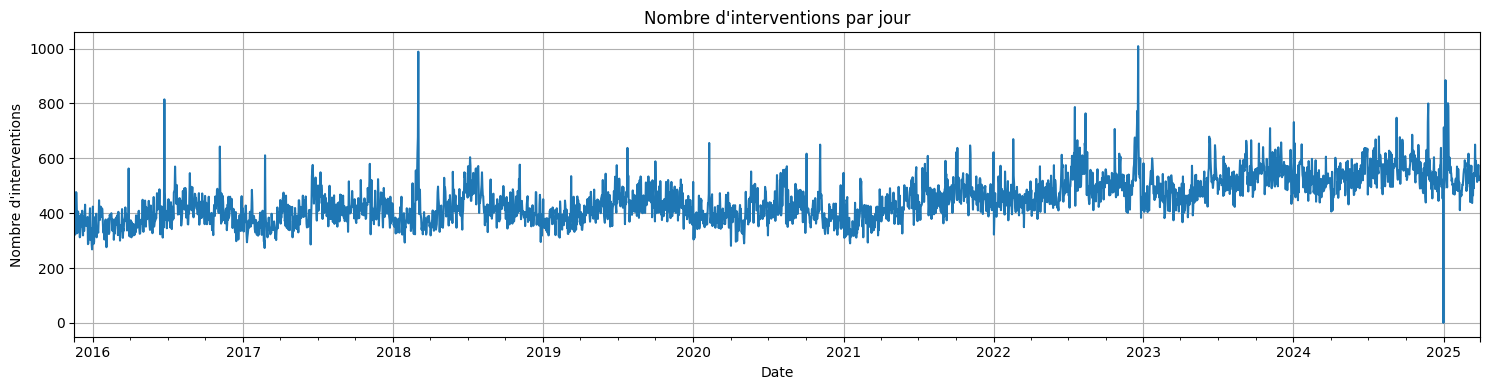

In [7]:
# V√©rifie que 'date_heure' est bien l'index de df
df.index = pd.to_datetime(df.index)

# Agr√©ger les incidents par jour 
y = df.resample('D').size()

# (Optionnel) S'assurer qu'il n'y a pas de valeurs manquantes
y = y.asfreq('D').fillna(0)

# Visualisation rapide pour contr√¥le
y.plot(title="Nombre d'interventions par jour", figsize=(15, 4))
plt.xlabel("Date")
plt.ylabel("Nombre d'interventions")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# 1. D√©finir le mod√®le SARIMA 
print("Entra√Ænement du mod√®le SARIMASARIMA(1,1,0)(1,1,1,365)...")
model = SARIMAX (y, 
                order=(1, 1, 0), 
                seasonal_order=(1, 1, 1, 365), 
                enforce_stationarity=False, 
                enforce_invertibility=False)
results = model.fit(disp=False)
print("Mod√®le entra√Æn√© avec succ√®s.")


Entra√Ænement du mod√®le SARIMASARIMA(1,1,0)(1,1,1,365)...


MemoryError: Unable to allocate 13.7 GiB for an array with shape (732, 732, 3422) and data type float64

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 3422
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 30)   Log Likelihood              -18019.346
Date:                              Tue, 10 Jun 2025   AIC                          36052.691
Time:                                      00:43:19   BIC                          36095.525
Sample:                                  11-17-2015   HQIC                         36068.010
                                       - 03-30-2025                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0889      0.022     48.528      0.000       1.045       1.133
ar.L2         -0.12

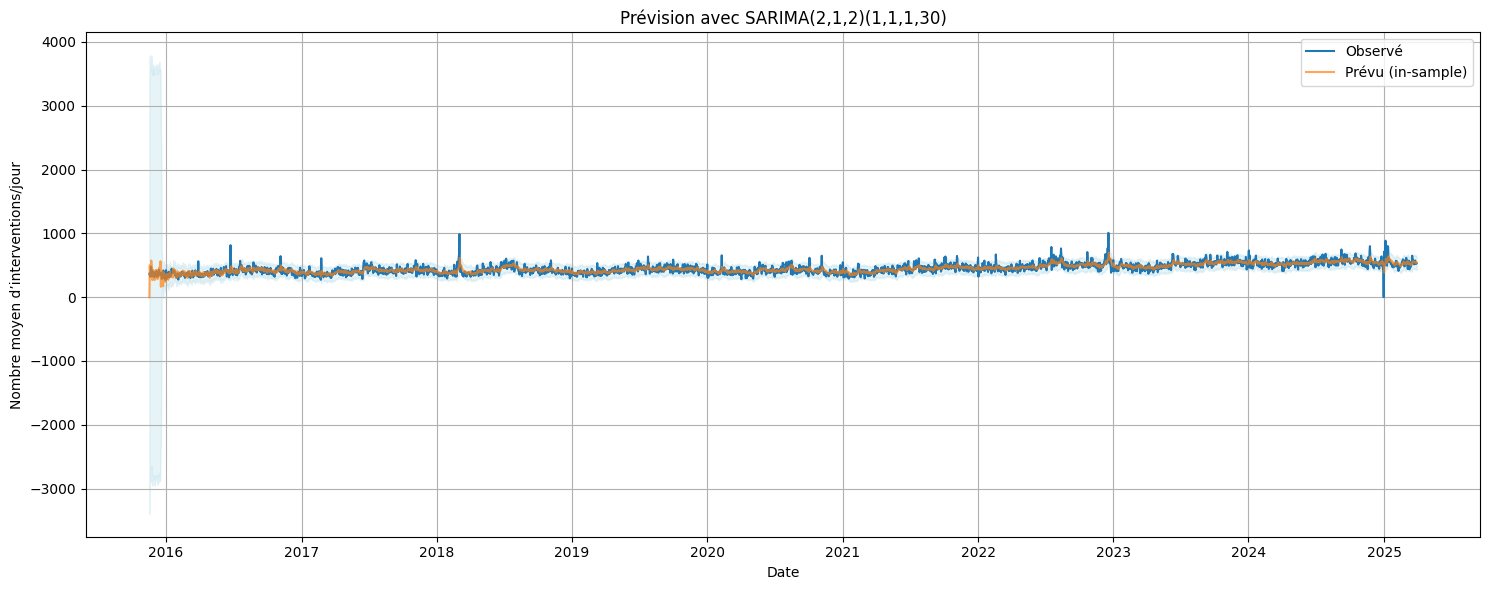

Erreur quadratique moyenne (MSE) : 2780.48
Erreur absolue moyenne (MAE) : 38.06


In [ ]:
# 2. R√©sum√© du mod√®le 
print(results.summary())

# 3. Pr√©diction in-sample (valeurs connues) 
pred = results.get_prediction(start=y.index[0], end=y.index[-1], dynamic=False)
pred_ci = pred.conf_int()

# 4. Visualisation 
plt.figure(figsize=(15, 6))
plt.plot(y, label='Observ√©')
plt.plot(pred.predicted_mean, label='Pr√©vu (in-sample)', alpha=0.7)
plt.fill_between(pred_ci.index, 
                 pred_ci.iloc[:, 0], 
                 pred_ci.iloc[:, 1], color='lightblue', alpha=0.3)
plt.title('Pr√©vision avec SARIMA(2,1,2)(1,1,1,30)')
plt.xlabel('Date')
plt.ylabel('Nombre moyen d‚Äôinterventions/jour')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. √âvaluation
mse = mean_squared_error(y, pred.predicted_mean)
mae = mean_absolute_error(y, pred.predicted_mean)
print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")
print(f"Erreur absolue moyenne (MAE) : {mae:.2f}")



<span style=" color:#4287f5 ; font-size:1.2em; font-weight:bold" > 6.1-Pr√©diction future sur 30 jours </span>


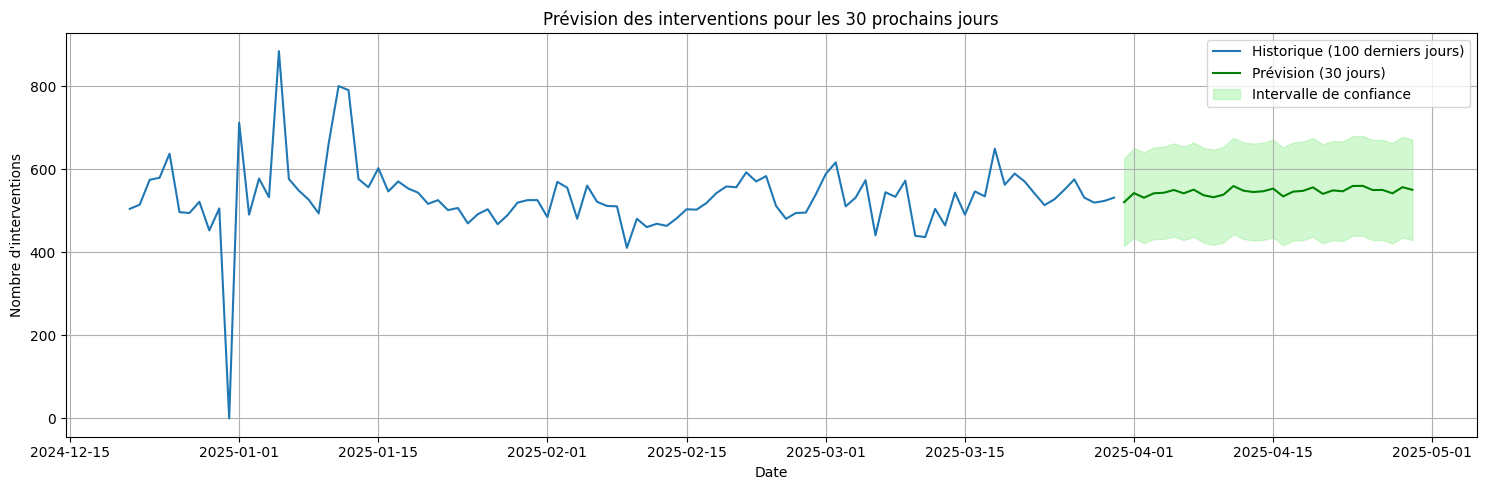

In [11]:
# D√©finir la p√©riode de pr√©vision
forecast_steps = 30
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Visualisation
plt.figure(figsize=(15, 5))
plt.plot(y[-100:], label='Historique (100 derniers jours)')
plt.plot(forecast_mean, label='Pr√©vision (30 jours)', color='green')
plt.fill_between(conf_int.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='lightgreen', alpha=0.4, label='Intervalle de confiance')
plt.title("Pr√©vision des interventions pour les 30 prochains jours")
plt.xlabel("Date")
plt.ylabel("Nombre d'interventions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<span style=" color:#4287f5 ; font-size:1.2em; font-weight:bold" > 6.2-Pr√©diction future sur 6 mois </span>


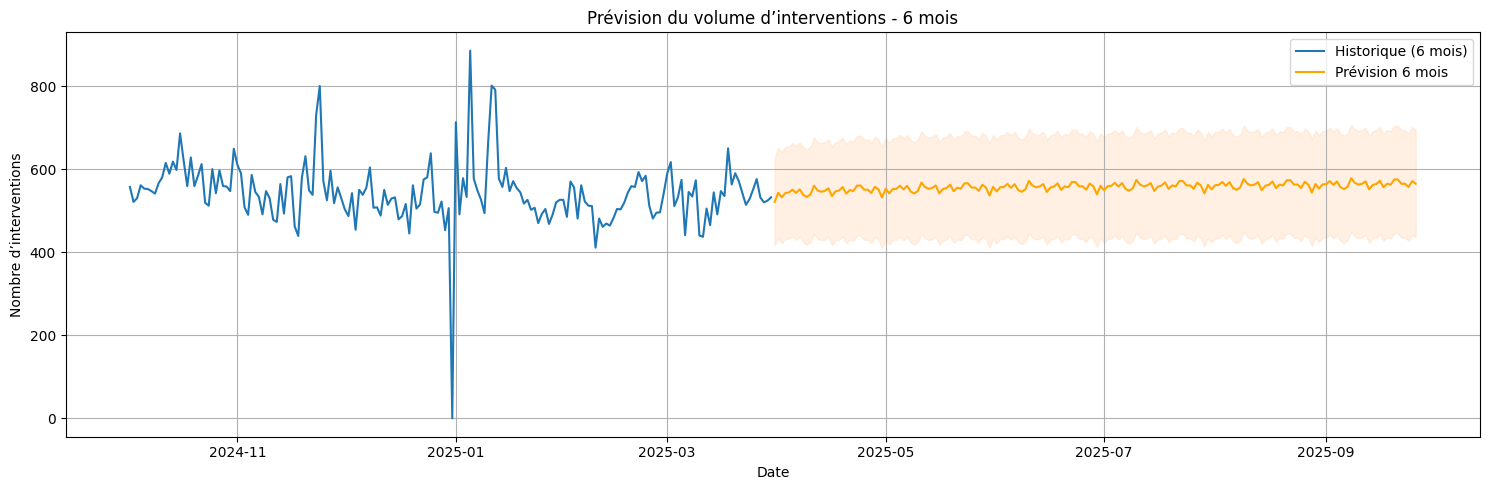

In [13]:
forecast_180 = results.get_forecast(steps=180)
mean_180 = forecast_180.predicted_mean
conf_180 = forecast_180.conf_int()

plt.figure(figsize=(15, 5))
plt.plot(y[-180:], label='Historique (6 mois)')
plt.plot(mean_180, label='Pr√©vision 6 mois', color='orange')
plt.fill_between(conf_180.index, conf_180.iloc[:, 0], conf_180.iloc[:, 1], color='peachpuff', alpha=0.4)
plt.title("Pr√©vision du volume d‚Äôinterventions - 6 mois")
plt.xlabel("Date")
plt.ylabel("Nombre d‚Äôinterventions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<span style=" color:#4287f5 ; font-size:1.2em; font-weight:bold" > 6.3-Pr√©diction future sur l'ann√©e </span>


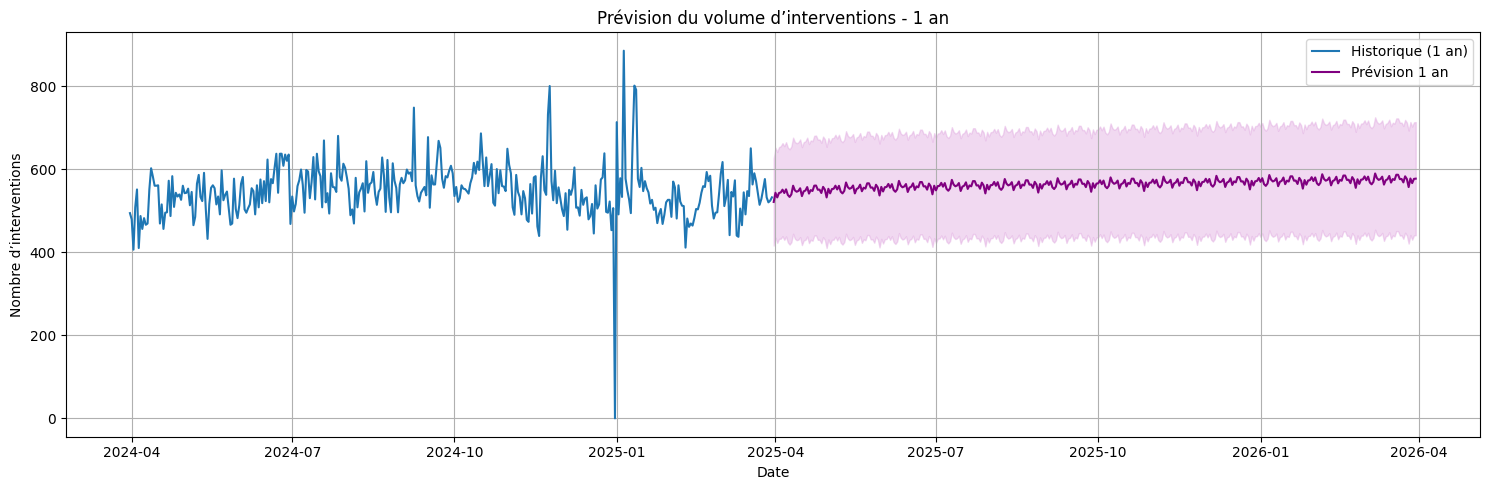

In [14]:
forecast_365 = results.get_forecast(steps=365)
mean_365 = forecast_365.predicted_mean
conf_365 = forecast_365.conf_int()

plt.figure(figsize=(15, 5))
plt.plot(y[-365:], label='Historique (1 an)')
plt.plot(mean_365, label='Pr√©vision 1 an', color='purple')
plt.fill_between(conf_365.index, conf_365.iloc[:, 0], conf_365.iloc[:, 1], color='plum', alpha=0.4)
plt.title("Pr√©vision du volume d‚Äôinterventions - 1 an")
plt.xlabel("Date")
plt.ylabel("Nombre d‚Äôinterventions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<span style=" color:#4287f5 ; font-size:1.2em; font-weight:bold" > 6.4-Pr√©diction future sur 30 jours en fonction du type d'incident: False Alarm, Fire, et Special Service </span>


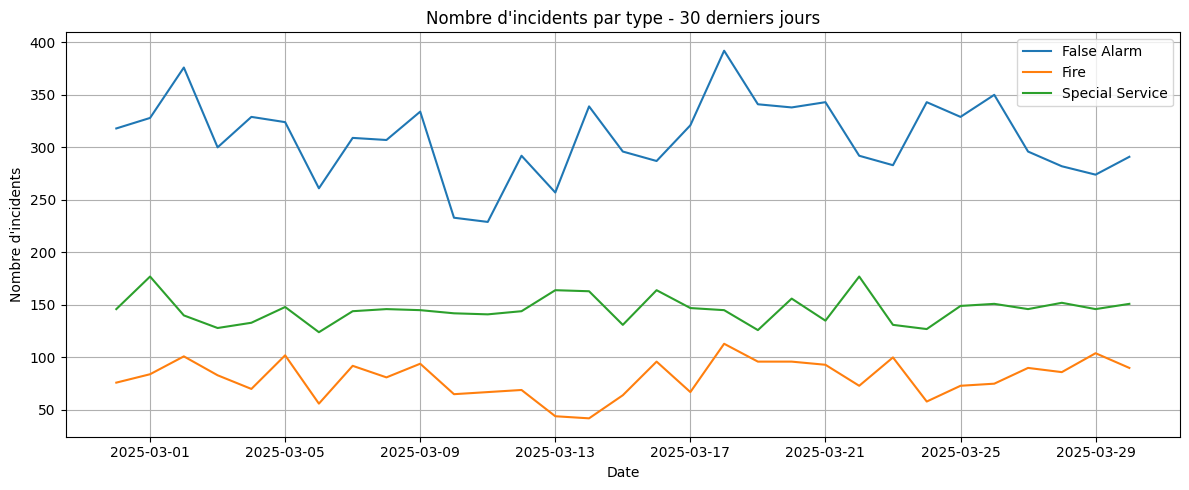

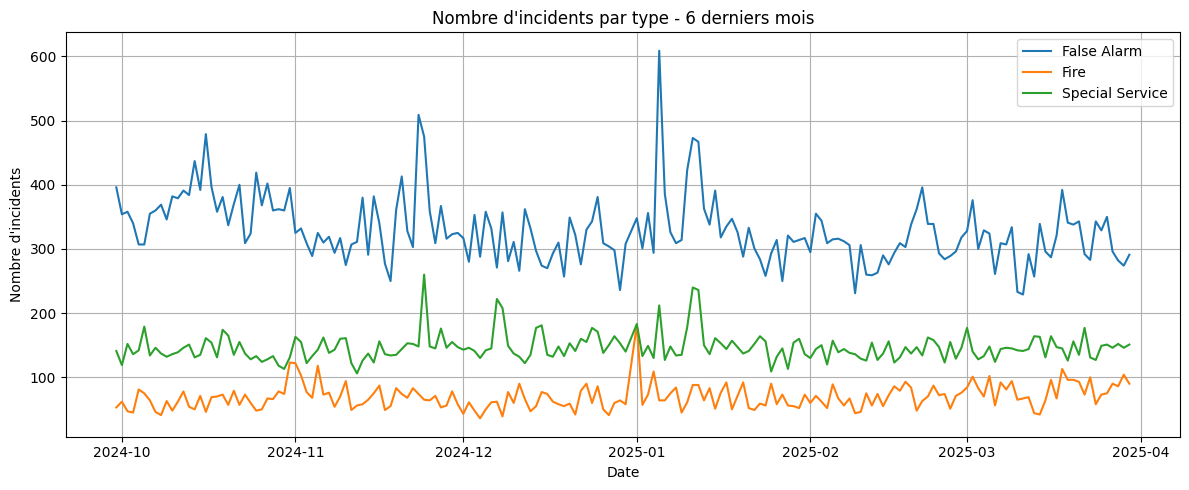

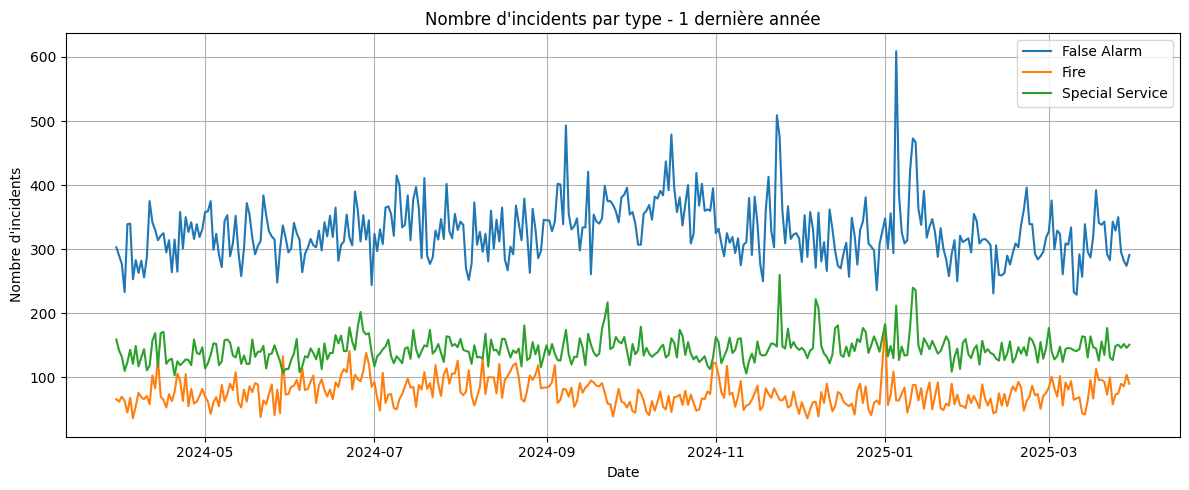

In [15]:
# Agr√©gation quotidienne du nombre d'incidents par groupe
daily_counts = df.groupby([df.index.date, 'IncidentGroup']).size().unstack(fill_value=0)
daily_counts.index = pd.to_datetime(daily_counts.index)

# Cr√©ation de sous-ensembles pour les 30 jours, 6 mois, et 1 an les plus r√©cents
last_date = daily_counts.index.max()

data_30j = daily_counts[last_date - pd.Timedelta(days=30): last_date]
data_6mois = daily_counts[last_date - pd.DateOffset(months=6): last_date]
data_1an = daily_counts[last_date - pd.DateOffset(years=1): last_date]

# Fonction de trac√©
def plot_incidents(data, title):
    plt.figure(figsize=(12, 5))
    for col in data.columns:
        plt.plot(data.index, data[col], label=col)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel("Nombre d'incidents")
    plt.legend()
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# üìä Visualisations
plot_incidents(data_30j, "Nombre d'incidents par type - 30 derniers jours")
plot_incidents(data_6mois, "Nombre d'incidents par type - 6 derniers mois")
plot_incidents(data_1an, "Nombre d'incidents par type - 1 derni√®re ann√©e")


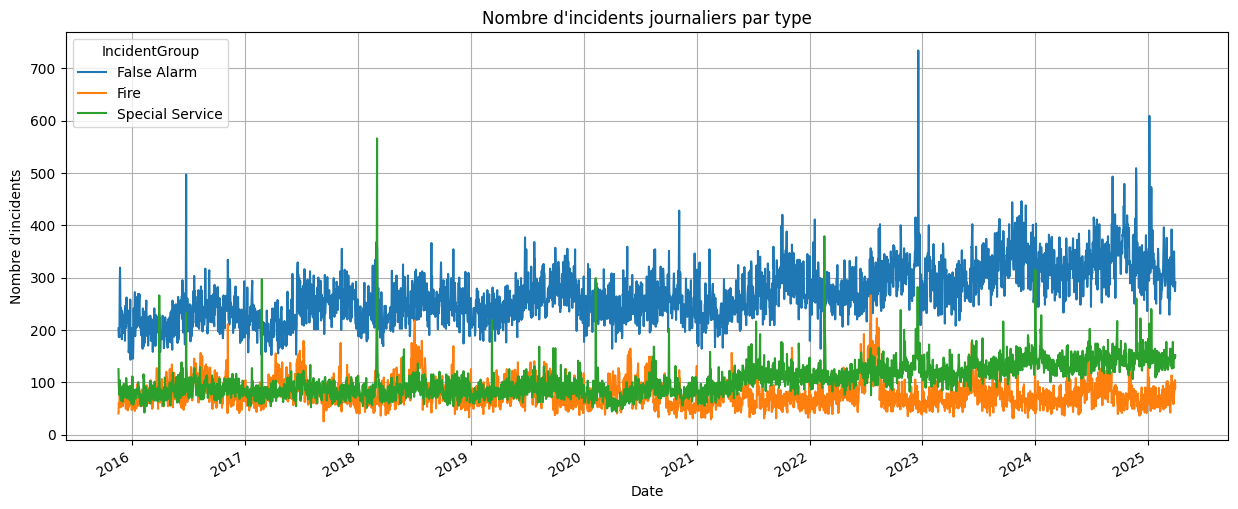


D√©composition pour le type : False Alarm


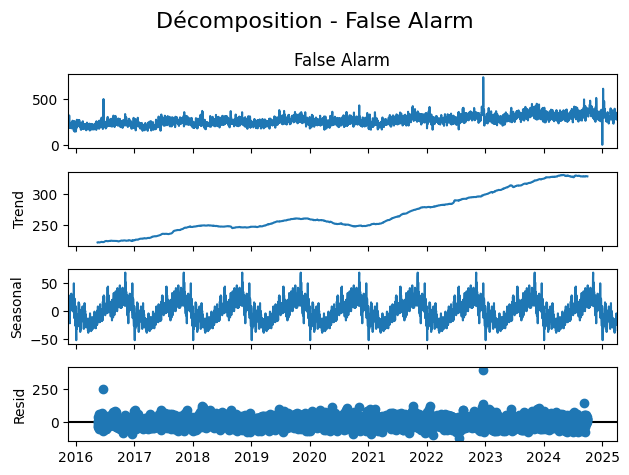


D√©composition pour le type : Fire


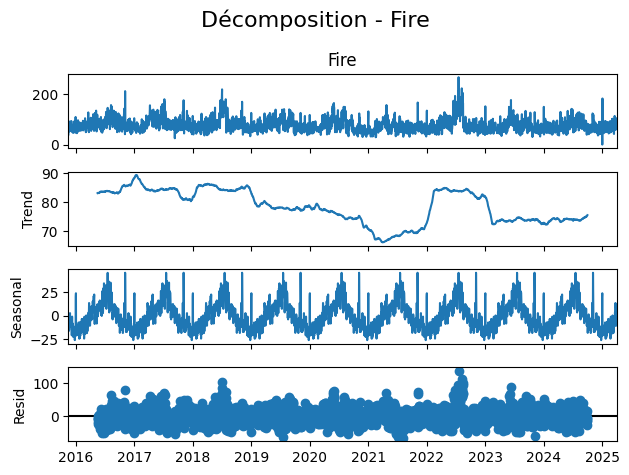


D√©composition pour le type : Special Service


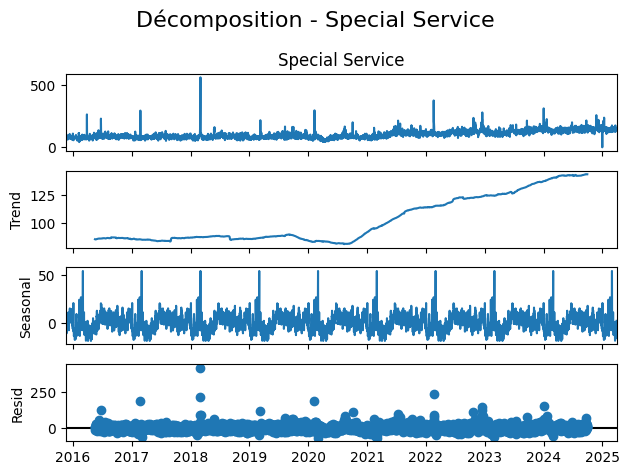

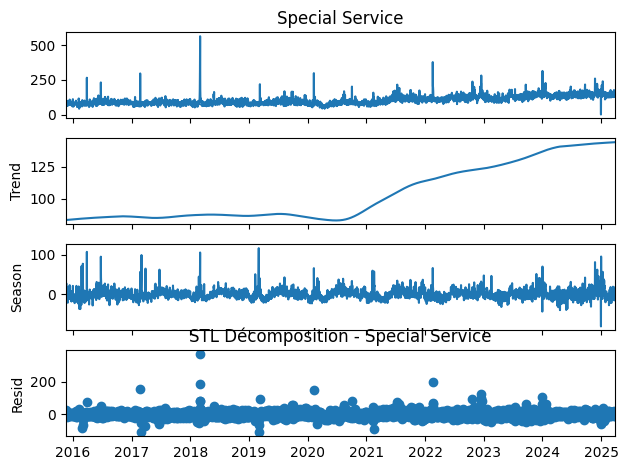

In [17]:
# Groupement journalier par type d'incident
df_grouped = df.groupby([df.index.date, 'IncidentGroup']).size().unstack(fill_value=0)
df_grouped.index = pd.to_datetime(df_grouped.index)
df_grouped = df_grouped.sort_index()

import matplotlib.pyplot as plt

df_grouped.plot(figsize=(15, 6))
plt.title("Nombre d'incidents journaliers par type")
plt.ylabel("Nombre d'incidents")
plt.xlabel("Date")
plt.grid(True)
plt.show()


from statsmodels.tsa.seasonal import seasonal_decompose

incident_types = df_grouped.columns

for incident in incident_types:
    print(f"\nD√©composition pour le type : {incident}")
    serie = df_grouped[incident]

    # Pour √©viter les erreurs, s'assurer qu'on a une s√©rie sans trous
    serie = serie.asfreq('D').fillna(0)

    result = seasonal_decompose(serie, model='additive', period=365)  # 365 pour cycle annuel

    result.plot()
    plt.suptitle(f"D√©composition - {incident}", fontsize=16)
    plt.tight_layout()
    plt.show()
from statsmodels.tsa.seasonal import STL

stl = STL(serie, period=365)
res = stl.fit()
res.plot()
plt.title(f"STL D√©composition - {incident}")
plt.show()


In [ ]:
SARIMA(1,1,0)(1,1,1,365)